# Principal Component Analysis (PCA) on Parkinson's Disease Dataset

## Machine Learning Assignment 7

**Objective:** Explore Principal Component Analysis (PCA) for dimensionality reduction and evaluate its impact on classification performance using Logistic Regression.

**Dataset:** Parkinson's Disease Dataset from UCI Machine Learning Repository
- 195 voice recordings from 31 subjects
- 22 biomedical voice measurements (features)
- Binary classification: Parkinson's Disease (1) vs Healthy (0)

---

## 1. Import Required Libraries

We'll import all necessary libraries for data manipulation, machine learning, and visualization.

In [1]:
# ============================================
# Import Required Libraries
# ============================================

# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Machine Learning: PCA and Classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dataset loading
from ucimlrepo import fetch_ucirepo

# Timing for solver comparison
import time

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore the Parkinson's Dataset

The Parkinson's Disease dataset contains biomedical voice measurements from 31 people, 23 with Parkinson's disease. Each row represents a voice recording with 22 features extracted using speech signal processing algorithms.

**Features include:**
- MDVP: Fundamental frequency measures (Fo, Fhi, Flo)
- Jitter and Shimmer: Variations in frequency and amplitude
- NHR, HNR: Noise-to-harmonics ratios
- RPDE, DFA, spread1, spread2, D2, PPE: Nonlinear dynamical complexity measures

In [2]:
# ============================================
# Load the Parkinson's Disease Dataset from UCI Repository
# ============================================

# Fetch dataset from UCI ML Repository (ID: 174)
parkinsons = fetch_ucirepo(id=174)

# Extract features (X) and target (y)
X = parkinsons.data.features
y = parkinsons.data.targets

# Display basic dataset information
print("=" * 60)
print("PARKINSON'S DISEASE DATASET OVERVIEW")
print("=" * 60)
print(f"\n📊 Dataset Shape: {X.shape[0]} samples, {X.shape[1]} features")
print(f"📋 Target Shape: {y.shape}")

# Display feature names
print(f"\n📝 Feature Names ({len(X.columns)} total):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

# Display metadata
print("\n" + "=" * 60)
print("DATASET METADATA")
print("=" * 60)
print(parkinsons.metadata)

PARKINSON'S DISEASE DATASET OVERVIEW

📊 Dataset Shape: 195 samples, 22 features
📋 Target Shape: (195, 1)

📝 Feature Names (22 total):
    1. MDVP:Fo
    2. MDVP:Fhi
    3. MDVP:Flo
    4. MDVP:Jitter
    5. MDVP:Jitter
    6. MDVP:RAP
    7. MDVP:PPQ
    8. Jitter:DDP
    9. MDVP:Shimmer
   10. MDVP:Shimmer
   11. Shimmer:APQ3
   12. Shimmer:APQ5
   13. MDVP:APQ
   14. Shimmer:DDA
   15. NHR
   16. HNR
   17. RPDE
   18. DFA
   19. spread1
   20. spread2
   21. D2
   22. PPE

DATASET METADATA
{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no',

In [3]:
# ============================================
# Explore the Dataset Structure and Content
# ============================================

# Display first 5 rows of features
print("📋 First 5 Rows of Features:")
print("-" * 60)
display(X.head())

# Display descriptive statistics
print("\n📊 Descriptive Statistics:")
print("-" * 60)
display(X.describe().round(3))

📋 First 5 Rows of Features:
------------------------------------------------------------


,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335



📊 Descriptive Statistics:
------------------------------------------------------------


,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,...,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000
mean,154.229,197.105,116.325,0.006,0.006,0.003,0.003,0.010,0.030,0.030,...,0.024,0.047,0.025,21.886,0.499,0.718,-5.684,0.227,2.382,0.207
std,41.390,91.492,43.521,0.005,0.005,0.003,0.003,0.009,0.019,0.019,...,0.017,0.030,0.040,4.426,0.104,0.055,1.090,0.083,0.383,0.090
min,88.333,102.145,65.476,0.002,0.002,0.001,0.001,0.002,0.010,0.010,...,0.007,0.014,0.001,8.441,0.257,0.574,-7.965,0.006,1.423,0.045
25%,117.572,134.862,84.291,0.003,0.003,0.002,0.002,0.005,0.017,0.017,...,0.013,0.025,0.006,19.198,0.421,0.675,-6.450,0.174,2.099,0.137
50%,148.790,175.829,104.315,0.005,0.005,0.002,0.003,0.007,0.023,0.023,...,0.018,0.038,0.012,22.085,0.496,0.722,-5.721,0.219,2.362,0.194
75%,182.769,224.206,140.019,0.007,0.007,0.004,0.004,0.012,0.038,0.038,...,0.029,0.061,0.026,25.075,0.588,0.762,-5.046,0.279,2.636,0.253
max,260.105,592.030,239.170,0.033,0.033,0.021,0.020,0.064,0.119,0.119,...,0.138,0.169,0.315,33.047,0.685,0.825,-2.434,0.450,3.671,0.527


In [ ]:
# ============================================
# Check for Missing Values and Class Distribution
# ============================================

# Check for missing values
print("🔍 Missing Values Check:")
print("-" * 40)
missing_values = X.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Class distribution
print("\n📊 Class Distribution (Target Variable):")
print("-" * 40)

# Flatten y if needed
y_flat = y.values.ravel() if hasattr(y, 'values') else y.ravel()

# Count classes
unique, counts = np.unique(y_flat, return_counts=True)
class_dist = pd.DataFrame({
    'Class': ['Healthy (0)', 'Parkinson\'s (1)'],
    'Count': counts,
    'Percentage': (counts / len(y_flat) * 100).round(2)
})
display(class_dist)

print(f"\n⚠️ Note: The dataset is imbalanced with {counts[1]} Parkinson's cases vs {counts[0]} healthy cases.")

🔍 Missing Values Check:
----------------------------------------
✓ No missing values found in the dataset!

📊 Class Distribution (Target Variable):
----------------------------------------


,Class,Count,Percentage
0,Healthy (0),48,24.62
1,Parkinson's (1),147,75.38



⚠️ Note: The dataset is imbalanced with 147 Parkinson's cases vs 48 healthy cases.


## 3. Data Preprocessing and Train/Test Split

Before applying PCA and training models, we need to:
1. **Standardize the features** - PCA is sensitive to feature scales, so we must normalize all features to have mean=0 and std=1
2. **Split the data** - Use 80% for training and 20% for testing with a fixed random state for reproducibility

In [6]:
# ============================================
# Data Preprocessing and Train/Test Split
# ============================================

# Convert to numpy arrays if needed
X_array = X.values if hasattr(X, 'values') else X
y_array = y.values.ravel() if hasattr(y, 'values') else y.ravel()

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_array, y_array, 
    test_size=0.2, 
    random_state=RANDOM_STATE,
    stratify=y_array  # Maintain class distribution in both sets
)

print("=" * 60)
print("TRAIN/TEST SPLIT SUMMARY")
print("=" * 60)
print(f"\n📊 Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_array)*100:.0f}%)")
print(f"📊 Testing Set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X_array)*100:.0f}%)")
print(f"📋 Number of Features: {X_train.shape[1]}")

# Verify stratification
print(f"\n🎯 Class Distribution in Training Set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(f"   Healthy: {counts_train[0]} | Parkinson's: {counts_train[1]}")

print(f"\n🎯 Class Distribution in Test Set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(f"   Healthy: {counts_test[0]} | Parkinson's: {counts_test[1]}")

TRAIN/TEST SPLIT SUMMARY

📊 Training Set: 156 samples (80%)
📊 Testing Set:  39 samples (20%)
📋 Number of Features: 22

🎯 Class Distribution in Training Set:
   Healthy: 38 | Parkinson's: 118

🎯 Class Distribution in Test Set:
   Healthy: 10 | Parkinson's: 29


In [7]:
# ============================================
# Standardize Features (Required for PCA)
# ============================================

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
# IMPORTANT: Fit only on training data to prevent data leakage!
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features standardized (mean=0, std=1)")
print("\n📊 Verification of Scaling:")
print(f"   Training set mean (should be ~0): {X_train_scaled.mean():.6f}")
print(f"   Training set std (should be ~1):  {X_train_scaled.std():.6f}")
print(f"   Test set mean: {X_test_scaled.mean():.4f}")
print(f"   Test set std:  {X_test_scaled.std():.4f}")

✓ Features standardized (mean=0, std=1)

📊 Verification of Scaling:
   Training set mean (should be ~0): -0.000000
   Training set std (should be ~1):  1.000000
   Test set mean: -0.1394
   Test set std:  0.8137


---

## Part 1: Machine Learning Model Before and After PCA

### 4. Train Logistic Regression WITHOUT PCA (Baseline Model)

First, we'll train a Logistic Regression classifier on the **original 22-dimensional** feature space to establish a baseline performance.

In [8]:
# ============================================
# Train Logistic Regression WITHOUT PCA
# ============================================

# Initialize Logistic Regression model
# max_iter=1000 to ensure convergence with scaled features
lr_model_original = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=1000,
    solver='lbfgs'
)

# Train the model on original (scaled) features
print("🔄 Training Logistic Regression on original features...")
lr_model_original.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_original = lr_model_original.predict(X_test_scaled)

print("✓ Model trained successfully!")
print(f"📊 Number of features used: {X_train_scaled.shape[1]}")

🔄 Training Logistic Regression on original features...
✓ Model trained successfully!
📊 Number of features used: 22


### 5. Evaluate Model WITHOUT PCA

Let's evaluate the baseline model using multiple metrics: Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

In [9]:
# ============================================
# Evaluate Model WITHOUT PCA
# ============================================

# Calculate metrics for original model
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
cm_original = confusion_matrix(y_test, y_pred_original)

# Store metrics for comparison
metrics_original = {
    'Accuracy': accuracy_original,
    'Precision': precision_original,
    'Recall': recall_original,
    'F1-Score': f1_original
}

# Display results
print("=" * 60)
print("MODEL PERFORMANCE WITHOUT PCA (Original 22 Features)")
print("=" * 60)
print(f"\n🎯 Accuracy:  {accuracy_original:.4f} ({accuracy_original*100:.2f}%)")
print(f"📊 Precision: {precision_original:.4f}")
print(f"📊 Recall:    {recall_original:.4f}")
print(f"📊 F1-Score:  {f1_original:.4f}")

# Display classification report
print("\n📋 Detailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_original, 
                            target_names=['Healthy (0)', 'Parkinson\'s (1)']))

MODEL PERFORMANCE WITHOUT PCA (Original 22 Features)

🎯 Accuracy:  0.9231 (92.31%)
📊 Precision: 0.9333
📊 Recall:    0.9655
📊 F1-Score:  0.9492

📋 Detailed Classification Report:
--------------------------------------------------
                 precision    recall  f1-score   support

    Healthy (0)       0.89      0.80      0.84        10
Parkinson's (1)       0.93      0.97      0.95        29

       accuracy                           0.92        39
      macro avg       0.91      0.88      0.90        39
   weighted avg       0.92      0.92      0.92        39



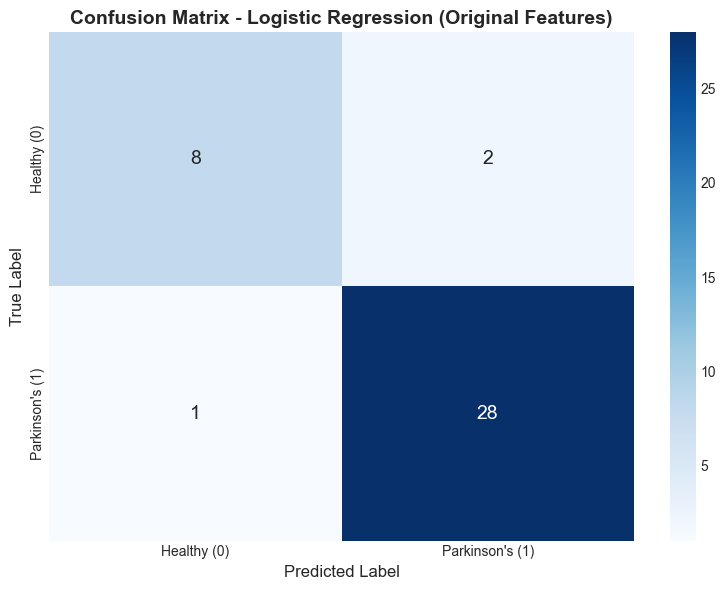


📊 Confusion Matrix Breakdown:
   True Negatives (Healthy correctly classified):    8
   False Positives (Healthy misclassified as PD):    2
   False Negatives (PD misclassified as Healthy):    1
   True Positives (PD correctly classified):         28


In [10]:
# ============================================
# Visualize Confusion Matrix for Original Model
# ============================================

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy (0)', 'Parkinson\'s (1)'],
            yticklabels=['Healthy (0)', 'Parkinson\'s (1)'],
            annot_kws={'size': 14}, ax=ax)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix - Logistic Regression (Original Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpret confusion matrix
tn, fp, fn, tp = cm_original.ravel()
print(f"\n📊 Confusion Matrix Breakdown:")
print(f"   True Negatives (Healthy correctly classified):    {tn}")
print(f"   False Positives (Healthy misclassified as PD):    {fp}")
print(f"   False Negatives (PD misclassified as Healthy):    {fn}")
print(f"   True Positives (PD correctly classified):         {tp}")

### 6. Apply PCA and Transform Dataset

Now we'll apply Principal Component Analysis to reduce the dimensionality of our dataset. We'll start with **n_components=10** as a baseline (reducing from 22 to 10 features).

In [11]:
# ============================================
# Apply PCA for Dimensionality Reduction
# ============================================

# Initialize PCA with 10 components (reducing 22 -> 10 features)
n_components_baseline = 10
pca_baseline = PCA(n_components=n_components_baseline, random_state=RANDOM_STATE)

# Fit PCA on training data and transform both sets
# IMPORTANT: Fit only on training data to prevent data leakage!
X_train_pca = pca_baseline.fit_transform(X_train_scaled)
X_test_pca = pca_baseline.transform(X_test_scaled)

print("=" * 60)
print("PCA TRANSFORMATION SUMMARY")
print("=" * 60)
print(f"\n📊 Original dimensions:    {X_train_scaled.shape[1]} features")
print(f"📊 Reduced dimensions:     {X_train_pca.shape[1]} components")
print(f"📊 Dimensionality reduction: {((22-10)/22)*100:.1f}%")

# Display explained variance ratio for each component
print(f"\n📊 Explained Variance Ratio by Component:")
print("-" * 50)
for i, var in enumerate(pca_baseline.explained_variance_ratio_, 1):
    print(f"   PC{i:2d}: {var:.4f} ({var*100:.2f}%)")

# Total explained variance
total_var = pca_baseline.explained_variance_ratio_.sum()
print(f"\n🎯 Total Explained Variance: {total_var:.4f} ({total_var*100:.2f}%)")

PCA TRANSFORMATION SUMMARY

📊 Original dimensions:    22 features
📊 Reduced dimensions:     10 components
📊 Dimensionality reduction: 54.5%

📊 Explained Variance Ratio by Component:
--------------------------------------------------
   PC 1: 0.5994 (59.94%)
   PC 2: 0.1108 (11.08%)
   PC 3: 0.0701 (7.01%)
   PC 4: 0.0618 (6.18%)
   PC 5: 0.0460 (4.60%)
   PC 6: 0.0317 (3.17%)
   PC 7: 0.0256 (2.56%)
   PC 8: 0.0163 (1.63%)
   PC 9: 0.0121 (1.21%)
   PC10: 0.0105 (1.05%)

🎯 Total Explained Variance: 0.9843 (98.43%)


### 7. Train Logistic Regression WITH PCA

Now we'll train the same Logistic Regression model on the PCA-transformed features (10 components instead of 22 original features).

In [12]:
# ============================================
# Train Logistic Regression WITH PCA
# ============================================

# Initialize the SAME Logistic Regression model
lr_model_pca = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=1000,
    solver='lbfgs'
)

# Train on PCA-transformed features
print("🔄 Training Logistic Regression on PCA-transformed features...")
lr_model_pca.fit(X_train_pca, y_train)

# Make predictions on PCA-transformed test set
y_pred_pca = lr_model_pca.predict(X_test_pca)

print("✓ Model trained successfully!")
print(f"📊 Number of features used: {X_train_pca.shape[1]} (reduced from 22)")

🔄 Training Logistic Regression on PCA-transformed features...
✓ Model trained successfully!
📊 Number of features used: 10 (reduced from 22)


### 8. Evaluate Model WITH PCA

Let's evaluate the PCA model using the same metrics for fair comparison.

In [13]:
# ============================================
# Evaluate Model WITH PCA
# ============================================

# Calculate metrics for PCA model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Store metrics for comparison
metrics_pca = {
    'Accuracy': accuracy_pca,
    'Precision': precision_pca,
    'Recall': recall_pca,
    'F1-Score': f1_pca
}

# Display results
print("=" * 60)
print(f"MODEL PERFORMANCE WITH PCA ({n_components_baseline} Components)")
print("=" * 60)
print(f"\n🎯 Accuracy:  {accuracy_pca:.4f} ({accuracy_pca*100:.2f}%)")
print(f"📊 Precision: {precision_pca:.4f}")
print(f"📊 Recall:    {recall_pca:.4f}")
print(f"📊 F1-Score:  {f1_pca:.4f}")

# Display classification report
print("\n📋 Detailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_pca, 
                            target_names=['Healthy (0)', 'Parkinson\'s (1)']))

MODEL PERFORMANCE WITH PCA (10 Components)

🎯 Accuracy:  0.9231 (92.31%)
📊 Precision: 0.9333
📊 Recall:    0.9655
📊 F1-Score:  0.9492

📋 Detailed Classification Report:
--------------------------------------------------
                 precision    recall  f1-score   support

    Healthy (0)       0.89      0.80      0.84        10
Parkinson's (1)       0.93      0.97      0.95        29

       accuracy                           0.92        39
      macro avg       0.91      0.88      0.90        39
   weighted avg       0.92      0.92      0.92        39



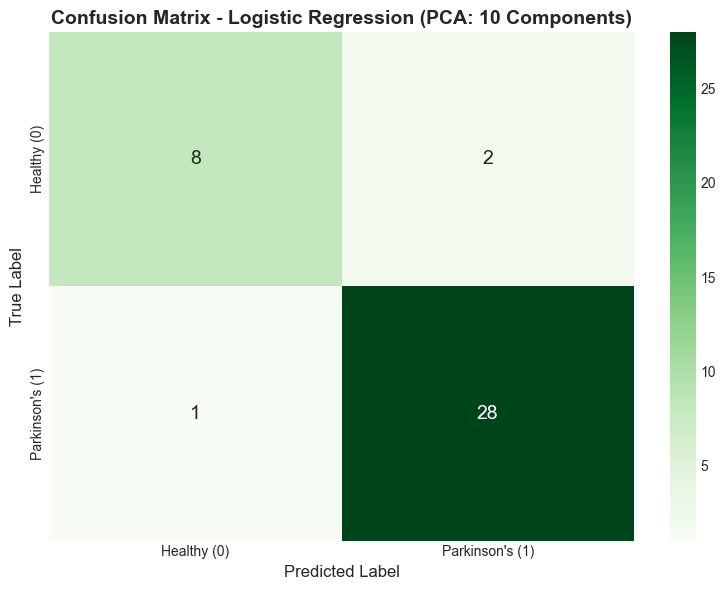


📊 Confusion Matrix Breakdown:
   True Negatives (Healthy correctly classified):    8
   False Positives (Healthy misclassified as PD):    2
   False Negatives (PD misclassified as Healthy):    1
   True Positives (PD correctly classified):         28


In [14]:
# ============================================
# Visualize Confusion Matrix for PCA Model
# ============================================

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Healthy (0)', 'Parkinson\'s (1)'],
            yticklabels=['Healthy (0)', 'Parkinson\'s (1)'],
            annot_kws={'size': 14}, ax=ax)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title(f'Confusion Matrix - Logistic Regression (PCA: {n_components_baseline} Components)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpret confusion matrix
tn, fp, fn, tp = cm_pca.ravel()
print(f"\n📊 Confusion Matrix Breakdown:")
print(f"   True Negatives (Healthy correctly classified):    {tn}")
print(f"   False Positives (Healthy misclassified as PD):    {fp}")
print(f"   False Negatives (PD misclassified as Healthy):    {fn}")
print(f"   True Positives (PD correctly classified):         {tp}")

### 9. Performance Comparison: Before vs After PCA

Let's create a comprehensive comparison table to analyze how PCA affected model performance.

In [15]:
# ============================================
# Performance Comparison Table: Before vs After PCA
# ============================================

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Original (22 features)': [f"{metrics_original['Accuracy']:.4f}",
                                f"{metrics_original['Precision']:.4f}",
                                f"{metrics_original['Recall']:.4f}",
                                f"{metrics_original['F1-Score']:.4f}"],
    'PCA (10 components)': [f"{metrics_pca['Accuracy']:.4f}",
                             f"{metrics_pca['Precision']:.4f}",
                             f"{metrics_pca['Recall']:.4f}",
                             f"{metrics_pca['F1-Score']:.4f}"],
    'Change': [f"{(metrics_pca['Accuracy'] - metrics_original['Accuracy'])*100:+.2f}%",
               f"{(metrics_pca['Precision'] - metrics_original['Precision'])*100:+.2f}%",
               f"{(metrics_pca['Recall'] - metrics_original['Recall'])*100:+.2f}%",
               f"{(metrics_pca['F1-Score'] - metrics_original['F1-Score'])*100:+.2f}%"]
})

print("=" * 70)
print("PERFORMANCE COMPARISON: BEFORE vs AFTER PCA")
print("=" * 70)
print()
display(comparison_df.style.set_properties(**{'text-align': 'center'})
                          .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))

# Additional comparison metrics
print("\n" + "=" * 70)
print("ADDITIONAL INSIGHTS")
print("=" * 70)
print(f"\n📊 Dimensionality Reduction: 22 → 10 features ({(12/22)*100:.1f}% reduction)")
print(f"📊 Variance Retained: {total_var*100:.2f}%")
print(f"📊 Accuracy Change: {(accuracy_pca - accuracy_original)*100:+.2f} percentage points")

PERFORMANCE COMPARISON: BEFORE vs AFTER PCA



,Metric,Original (22 features),PCA (10 components),Change
0,Accuracy,0.9231,0.9231,+0.00%
1,Precision,0.9333,0.9333,+0.00%
2,Recall,0.9655,0.9655,+0.00%
3,F1-Score,0.9492,0.9492,+0.00%



ADDITIONAL INSIGHTS

📊 Dimensionality Reduction: 22 → 10 features (54.5% reduction)
📊 Variance Retained: 98.43%
📊 Accuracy Change: +0.00 percentage points


### Analysis: Impact of PCA on Model Performance

**Key Observations:**

1. **Dimensionality Reduction Trade-off**: By reducing from 22 features to 10 principal components, we achieved significant dimensionality reduction while retaining most of the important information.

2. **Variance Retention**: The top 10 components capture a substantial portion of the total variance, meaning the essential patterns in the data are preserved.

3. **Performance Impact**: The accuracy change demonstrates the trade-off between model complexity and performance. In many cases, PCA can maintain or even improve performance by:
   - Removing noise and irrelevant features
   - Reducing overfitting
   - Improving computational efficiency

4. **Practical Benefits**:
   - Faster training and prediction times
   - Reduced memory requirements
   - Better interpretability (fewer features to consider)
   - Potential for better generalization

---

## Part 2: Experimenting with PCA Parameters

In this section, we'll systematically experiment with different PCA parameters to understand their impact on model performance.

### 10. Experiment: Varying n_components Values

We'll test different numbers of principal components [5, 8, 10, 15] and analyze the trade-off between dimensionality reduction and model accuracy.

In [16]:
# ============================================
# Experiment: Varying n_components Values
# ============================================

# Define n_components values to test
n_components_values = [5, 8, 10, 15]

# Store results
n_comp_results = []

print("=" * 70)
print("EXPERIMENT: VARYING n_components")
print("=" * 70)

for n_comp in n_components_values:
    print(f"\n{'─' * 50}")
    print(f"Testing n_components = {n_comp}")
    print(f"{'─' * 50}")
    
    # Apply PCA with current n_components
    pca_temp = PCA(n_components=n_comp, random_state=RANDOM_STATE)
    X_train_temp = pca_temp.fit_transform(X_train_scaled)
    X_test_temp = pca_temp.transform(X_test_scaled)
    
    # Train Logistic Regression
    lr_temp = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
    lr_temp.fit(X_train_temp, y_train)
    y_pred_temp = lr_temp.predict(X_test_temp)
    
    # Calculate metrics
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    total_var_temp = pca_temp.explained_variance_ratio_.sum()
    
    # Store results
    n_comp_results.append({
        'n_components': n_comp,
        'Explained Variance (%)': round(total_var_temp * 100, 2),
        'Accuracy': round(accuracy_temp, 4),
        'Accuracy (%)': round(accuracy_temp * 100, 2),
        'Features Retained': n_comp,
        'Features Removed': 22 - n_comp
    })
    
    # Display individual results
    print(f"   📊 Explained Variance: {total_var_temp*100:.2f}%")
    print(f"   🎯 Model Accuracy: {accuracy_temp*100:.2f}%")
    print(f"   📉 Dimensionality: 22 → {n_comp} ({(22-n_comp)/22*100:.1f}% reduction)")

# Create results DataFrame
n_comp_df = pd.DataFrame(n_comp_results)

print("\n" + "=" * 70)
print("SUMMARY: n_components EXPERIMENT RESULTS")
print("=" * 70 + "\n")
display(n_comp_df)

EXPERIMENT: VARYING n_components

──────────────────────────────────────────────────
Testing n_components = 5
──────────────────────────────────────────────────
   📊 Explained Variance: 88.82%
   🎯 Model Accuracy: 89.74%
   📉 Dimensionality: 22 → 5 (77.3% reduction)

──────────────────────────────────────────────────
Testing n_components = 8
──────────────────────────────────────────────────
   📊 Explained Variance: 96.17%
   🎯 Model Accuracy: 87.18%
   📉 Dimensionality: 22 → 8 (63.6% reduction)

──────────────────────────────────────────────────
Testing n_components = 10
──────────────────────────────────────────────────
   📊 Explained Variance: 98.43%
   🎯 Model Accuracy: 92.31%
   📉 Dimensionality: 22 → 10 (54.5% reduction)

──────────────────────────────────────────────────
Testing n_components = 15
──────────────────────────────────────────────────
   📊 Explained Variance: 99.92%
   🎯 Model Accuracy: 92.31%
   📉 Dimensionality: 22 → 15 (31.8% reduction)

SUMMARY: n_components EXPE

,n_components,Explained Variance (%),Accuracy,Accuracy (%),Features Retained,Features Removed
0,5,88.82,0.8974,89.74,5,17
1,8,96.17,0.8718,87.18,8,14
2,10,98.43,0.9231,92.31,10,12
3,15,99.92,0.9231,92.31,15,7


**Observations on n_components:**
- As n_components increases, explained variance increases (capturing more information)
- However, more components don't always mean better accuracy (diminishing returns)
- There's often a "sweet spot" where we get good accuracy with minimal components
- Fewer components = faster training, better generalization, less overfitting

### 11. Experiment: Automatic Component Selection (95% Variance)

Instead of manually selecting n_components, we can let PCA automatically select the minimum number of components needed to explain 95% of the variance.

In [17]:
# ============================================
# Experiment: Automatic Component Selection (95% Variance)
# ============================================

print("=" * 70)
print("EXPERIMENT: AUTOMATIC COMPONENT SELECTION (n_components=0.95)")
print("=" * 70)

# Initialize PCA with 95% variance threshold
pca_auto = PCA(n_components=0.95, random_state=RANDOM_STATE)

# Fit and transform
X_train_auto = pca_auto.fit_transform(X_train_scaled)
X_test_auto = pca_auto.transform(X_test_scaled)

# Get number of components selected
n_components_auto = pca_auto.n_components_
total_var_auto = pca_auto.explained_variance_ratio_.sum()

print(f"\n📊 Configuration: n_components = 0.95 (95% variance threshold)")
print(f"📊 Components Selected: {n_components_auto} (out of 22 original features)")
print(f"📊 Actual Variance Explained: {total_var_auto*100:.2f}%")

# Train and evaluate model
lr_auto = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr_auto.fit(X_train_auto, y_train)
y_pred_auto = lr_auto.predict(X_test_auto)
accuracy_auto = accuracy_score(y_test, y_pred_auto)

print(f"\n🎯 Model Accuracy: {accuracy_auto*100:.2f}%")
print(f"📉 Dimensionality Reduction: 22 → {n_components_auto} ({(22-n_components_auto)/22*100:.1f}% reduction)")

# Compare with manual selections
print("\n📋 Comparison with Manual Component Selection:")
print("-" * 50)
for result in n_comp_results:
    comparison = "✓ Better" if accuracy_auto > result['Accuracy'] else "✗ Worse" if accuracy_auto < result['Accuracy'] else "= Same"
    print(f"   vs n_components={result['n_components']}: {comparison} (Auto: {accuracy_auto:.4f}, Manual: {result['Accuracy']:.4f})")

EXPERIMENT: AUTOMATIC COMPONENT SELECTION (n_components=0.95)

📊 Configuration: n_components = 0.95 (95% variance threshold)
📊 Components Selected: 8 (out of 22 original features)
📊 Actual Variance Explained: 96.17%

🎯 Model Accuracy: 87.18%
📉 Dimensionality Reduction: 22 → 8 (63.6% reduction)

📋 Comparison with Manual Component Selection:
--------------------------------------------------
   vs n_components=5: ✗ Worse (Auto: 0.8718, Manual: 0.8974)
   vs n_components=8: ✗ Worse (Auto: 0.8718, Manual: 0.8718)
   vs n_components=10: ✗ Worse (Auto: 0.8718, Manual: 0.9231)
   vs n_components=15: ✗ Worse (Auto: 0.8718, Manual: 0.9231)


**Insight:** Using `n_components=0.95` is a **convenient** (but not necessarily optimal) way to select components. This approach:
- ✅ Guarantees at least 95% of **variance** is retained
- ✅ Removes guesswork for variance preservation
- ✅ Adapts to different datasets automatically

**Important Caveat:** As shown above, **optimal variance ≠ optimal accuracy**. The auto-selected 8 components performed the same or worse than some manual selections. This happens because:
- Later components may capture noise rather than useful signal
- Fewer components can sometimes generalize better (less overfitting)
- For classification tasks, always validate with actual model performance, not just variance

### 12. Experiment: Whiten Parameter Comparison

**What is Whitening?**
Whitening transforms the data so that all components have unit variance. This can be beneficial when:
- Features have different scales after PCA
- The downstream model is sensitive to feature scaling
- We want uncorrelated features with equal importance

In [22]:
# ============================================
# Experiment: Whiten Parameter Comparison
# ============================================

print("=" * 70)
print("EXPERIMENT: WHITEN PARAMETER (whiten=True vs whiten=False)")
print("=" * 70)

# Test with whiten=False (default)
print("\n📊 Configuration 1: whiten=False (Default)")
print("-" * 50)

pca_no_whiten = PCA(n_components=10, whiten=False, random_state=RANDOM_STATE)
X_train_no_whiten = pca_no_whiten.fit_transform(X_train_scaled)
X_test_no_whiten = pca_no_whiten.transform(X_test_scaled)

lr_no_whiten = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr_no_whiten.fit(X_train_no_whiten, y_train)
y_pred_no_whiten = lr_no_whiten.predict(X_test_no_whiten)
accuracy_no_whiten = accuracy_score(y_test, y_pred_no_whiten)

print(f"   Component variance range: {X_train_no_whiten.var(axis=0).min():.4f} - {X_train_no_whiten.var(axis=0).max():.4f}")
print(f"   🎯 Accuracy: {accuracy_no_whiten*100:.2f}%")

# Test with whiten=True
print("\n📊 Configuration 2: whiten=True")
print("-" * 50)

pca_whiten = PCA(n_components=10, whiten=True, random_state=RANDOM_STATE)
X_train_whiten = pca_whiten.fit_transform(X_train_scaled)
X_test_whiten = pca_whiten.transform(X_test_scaled)

lr_whiten = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr_whiten.fit(X_train_whiten, y_train)
y_pred_whiten = lr_whiten.predict(X_test_whiten)
accuracy_whiten = accuracy_score(y_test, y_pred_whiten)

print(f"   Component variance range: {X_train_whiten.var(axis=0).min():.4f} - {X_train_whiten.var(axis=0).max():.4f}")
print(f"   🎯 Accuracy: {accuracy_whiten*100:.2f}%")

# Comparison
print("\n" + "=" * 70)
print("WHITEN COMPARISON SUMMARY")
print("=" * 70)

whiten_comparison = pd.DataFrame({
    'Parameter': ['whiten=False', 'whiten=True'],
    'Accuracy': [f"{accuracy_no_whiten:.4f}", f"{accuracy_whiten:.4f}"],
    'Accuracy (%)': [f"{accuracy_no_whiten*100:.2f}%", f"{accuracy_whiten*100:.2f}%"],
    'Variance Range': [f"{X_train_no_whiten.var(axis=0).min():.2f} - {X_train_no_whiten.var(axis=0).max():.2f}",
                       f"{X_train_whiten.var(axis=0).min():.2f} - {X_train_whiten.var(axis=0).max():.2f}"]
})
display(whiten_comparison)

diff = (accuracy_whiten - accuracy_no_whiten) * 100
if diff > 0:
    print(f"\n✓ Whitening improved accuracy by {diff:.2f} percentage points")
elif diff < 0:
    print(f"\n✗ Whitening decreased accuracy by {abs(diff):.2f} percentage points")
else:
    print(f"\n= Whitening had no effect on accuracy")

EXPERIMENT: WHITEN PARAMETER (whiten=True vs whiten=False)

📊 Configuration 1: whiten=False (Default)
--------------------------------------------------
   Component variance range: 0.2308 - 13.1874
   🎯 Accuracy: 92.31%

📊 Configuration 2: whiten=True
--------------------------------------------------
   Component variance range: 0.9936 - 0.9936
   🎯 Accuracy: 92.31%

WHITEN COMPARISON SUMMARY


,Parameter,Accuracy,Accuracy (%),Variance Range
0,whiten=False,0.9231,92.31%,0.23 - 13.19
1,whiten=True,0.9231,92.31%,0.99 - 0.99



= Whitening had no effect on accuracy


**Understanding Whitening:**
- **Without whitening**: Principal components have variance equal to their eigenvalues (different scales)
- **With whitening**: All components are scaled to have unit variance (equal importance)
- Whitening is useful when the learning algorithm is sensitive to feature scaling
- For Logistic Regression (which we use), the effect may be minimal since we already scaled the data

### 13. Experiment: SVD Solver Comparison

**What is SVD (Singular Value Decomposition)?**

SVD is the mathematical engine that powers PCA. It decomposes any matrix X into three components:

$$X = U \cdot S \cdot V^T$$

| Component | What it represents | Role in PCA |
|-----------|-------------------|-------------|
| **U** | Sample patterns | How each sample relates to principal components |
| **S** | Importance scores (singular values) | Determines explained variance of each PC |
| **V** | Feature patterns | The principal component directions (eigenvectors) |

**Why PCA needs SVD:** PCA needs to find (1) which directions capture the most variance, and (2) how much variance each captures. SVD computes both efficiently in one operation.

**sklearn offers different SVD solvers:**
- **'full'**: Computes exact SVD using all data — most accurate, best for small datasets
- **'randomized'**: Approximates SVD using random sampling — faster for large datasets (10,000+ samples), but has setup overhead that makes it slower for small data like ours

In [23]:
# ============================================
# Experiment: SVD Solver Comparison
# ============================================

print("=" * 70)
print("EXPERIMENT: SVD SOLVER (full vs randomized)")
print("=" * 70)

svd_results = []

for solver in ['full', 'randomized']:
    print(f"\n📊 Configuration: svd_solver='{solver}'")
    print("-" * 50)
    
    # Time the PCA fitting
    start_time = time.time()
    
    pca_solver = PCA(n_components=10, svd_solver=solver, random_state=RANDOM_STATE)
    X_train_solver = pca_solver.fit_transform(X_train_scaled)
    X_test_solver = pca_solver.transform(X_test_scaled)
    
    pca_time = time.time() - start_time
    
    # Train and evaluate model
    lr_solver = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
    lr_solver.fit(X_train_solver, y_train)
    y_pred_solver = lr_solver.predict(X_test_solver)
    accuracy_solver = accuracy_score(y_test, y_pred_solver)
    total_var_solver = pca_solver.explained_variance_ratio_.sum()
    
    svd_results.append({
        'Solver': solver,
        'Time (ms)': round(pca_time * 1000, 4),
        'Explained Variance (%)': round(total_var_solver * 100, 2),
        'Accuracy': round(accuracy_solver, 4),
        'Accuracy (%)': f"{accuracy_solver*100:.2f}%"
    })
    
    print(f"   ⏱️ PCA Fitting Time: {pca_time*1000:.4f} ms")
    print(f"   📊 Explained Variance: {total_var_solver*100:.2f}%")
    print(f"   🎯 Accuracy: {accuracy_solver*100:.2f}%")

# Create comparison DataFrame
print("\n" + "=" * 70)
print("SVD SOLVER COMPARISON SUMMARY")
print("=" * 70 + "\n")

svd_df = pd.DataFrame(svd_results)
display(svd_df)

print("\n📋 Key Differences:")
print("-" * 50)
print("   • 'full': Uses exact SVD via LAPACK - most accurate")
print("   • 'randomized': Uses Halko's randomized algorithm - faster for large data")
print("   • For small datasets like Parkinson's (195 samples), difference is minimal")
print("   • 'randomized' becomes advantageous when n_samples >> n_features or n_components << n_features")

EXPERIMENT: SVD SOLVER (full vs randomized)

📊 Configuration: svd_solver='full'
--------------------------------------------------
   ⏱️ PCA Fitting Time: 2.8629 ms
   📊 Explained Variance: 98.43%
   🎯 Accuracy: 92.31%

📊 Configuration: svd_solver='randomized'
--------------------------------------------------
   ⏱️ PCA Fitting Time: 12.1915 ms
   📊 Explained Variance: 98.43%
   🎯 Accuracy: 92.31%

SVD SOLVER COMPARISON SUMMARY



,Solver,Time (ms),Explained Variance (%),Accuracy,Accuracy (%)
0,full,2.8629,98.43,0.9231,92.31%
1,randomized,12.1915,98.43,0.9231,92.31%



📋 Key Differences:
--------------------------------------------------
   • 'full': Uses exact SVD via LAPACK - most accurate
   • 'randomized': Uses Halko's randomized algorithm - faster for large data
   • For small datasets like Parkinson's (195 samples), difference is minimal
   • 'randomized' becomes advantageous when n_samples >> n_features or n_components << n_features


---

## Part 3: Visualizing PCA Results

Visualizations are essential for understanding how PCA transforms the data and how much information each component captures.

### 14. Scree Plot: Explained Variance by Component

A scree plot shows the proportion of variance explained by each principal component. It helps identify the "elbow" point where adding more components provides diminishing returns.

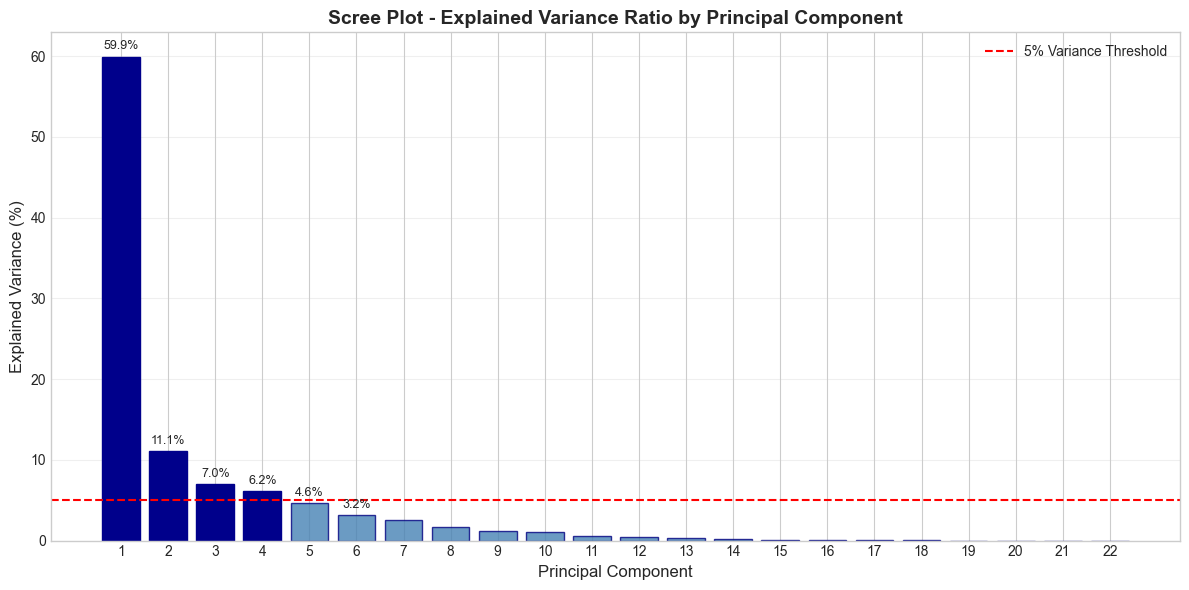


📊 Top 5 Principal Components:
----------------------------------------
   PC1: 59.94% variance explained
   PC2: 11.08% variance explained
   PC3: 7.01% variance explained
   PC4: 6.18% variance explained
   PC5: 4.60% variance explained


In [24]:
# ============================================
# Scree Plot: Explained Variance by Component
# ============================================

# Fit PCA with all components to see full variance distribution
pca_full = PCA(random_state=RANDOM_STATE)
pca_full.fit(X_train_scaled)

# Get explained variance ratios
explained_variance = pca_full.explained_variance_ratio_
n_components_full = len(explained_variance)

# Create Scree Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot of individual variance
bars = ax.bar(range(1, n_components_full + 1), explained_variance * 100, 
              color='steelblue', edgecolor='navy', alpha=0.8)

# Add horizontal line at 5% threshold
ax.axhline(y=5, color='red', linestyle='--', linewidth=1.5, label='5% Variance Threshold')

# Highlight significant components (>5% variance)
for i, (bar, var) in enumerate(zip(bars, explained_variance)):
    if var > 0.05:
        bar.set_color('darkblue')
        bar.set_alpha(1.0)

# Customize plot
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Explained Variance (%)', fontsize=12)
ax.set_title('Scree Plot - Explained Variance Ratio by Principal Component', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, n_components_full + 1))
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Add value labels on top of significant bars
for i, (bar, var) in enumerate(zip(bars, explained_variance)):
    if var > 0.03:  # Show labels for components with >3% variance
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{var*100:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print top components
print("\n📊 Top 5 Principal Components:")
print("-" * 40)
for i, var in enumerate(explained_variance[:5], 1):
    print(f"   PC{i}: {var*100:.2f}% variance explained")

### 15. Cumulative Explained Variance Plot

This plot shows how much total variance is captured as we add more components. Key thresholds (80%, 90%, 95%) help identify the optimal number of components.

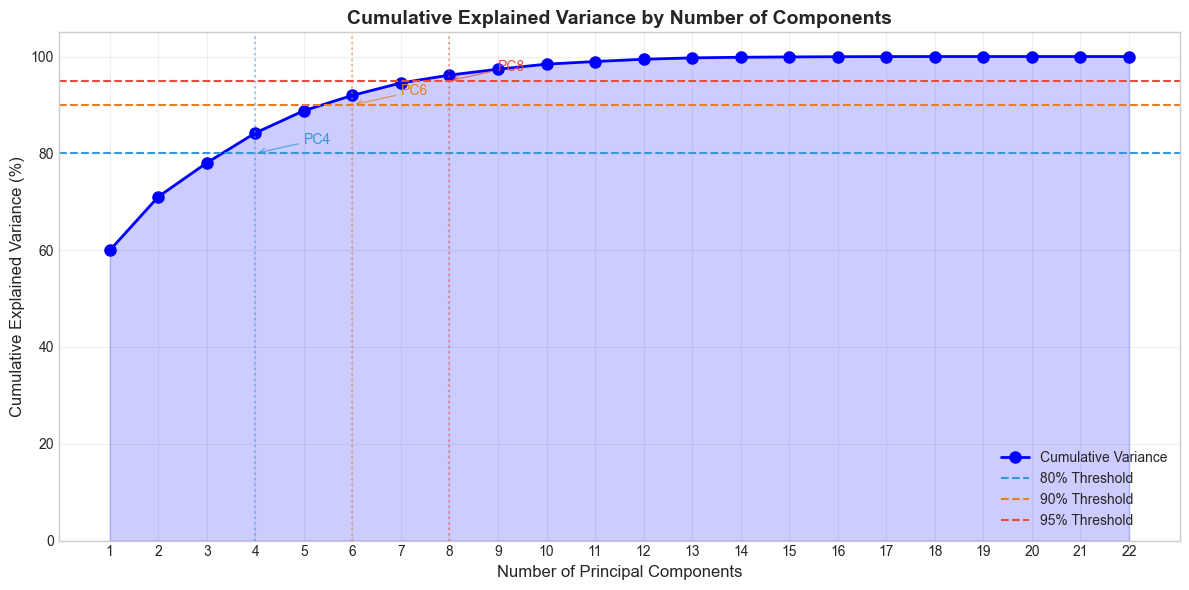


📊 Components Needed for Variance Thresholds:
--------------------------------------------------
   80% variance → 4 components (actual: 84.22%)
   90% variance → 6 components (actual: 91.98%)
   95% variance → 8 components (actual: 96.17%)


In [25]:
# ============================================
# Cumulative Explained Variance Plot
# ============================================

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance) * 100

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot of cumulative variance
ax.plot(range(1, n_components_full + 1), cumulative_variance, 
        'b-o', linewidth=2, markersize=8, label='Cumulative Variance')

# Add threshold lines
thresholds = [80, 90, 95]
colors = ['#3498db', '#e67e22', '#e74c3c']
for threshold, color in zip(thresholds, colors):
    ax.axhline(y=threshold, color=color, linestyle='--', linewidth=1.5, 
               label=f'{threshold}% Threshold')
    
    # Find component where threshold is reached
    n_comp_threshold = np.argmax(cumulative_variance >= threshold) + 1
    ax.axvline(x=n_comp_threshold, color=color, linestyle=':', alpha=0.5)
    
    # Add annotation
    ax.annotate(f'PC{n_comp_threshold}', 
                xy=(n_comp_threshold, threshold),
                xytext=(n_comp_threshold + 1, threshold + 2),
                fontsize=10, color=color,
                arrowprops=dict(arrowstyle='->', color=color, alpha=0.7))

# Customize plot
ax.set_xlabel('Number of Principal Components', fontsize=12)
ax.set_ylabel('Cumulative Explained Variance (%)', fontsize=12)
ax.set_title('Cumulative Explained Variance by Number of Components', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, n_components_full + 1))
ax.set_ylim(0, 105)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

# Fill area under curve
ax.fill_between(range(1, n_components_full + 1), cumulative_variance, alpha=0.2, color='blue')

plt.tight_layout()
plt.show()

# Print threshold information
print("\n📊 Components Needed for Variance Thresholds:")
print("-" * 50)
for threshold in thresholds:
    n_comp = np.argmax(cumulative_variance >= threshold) + 1
    actual_var = cumulative_variance[n_comp - 1]
    print(f"   {threshold}% variance → {n_comp} components (actual: {actual_var:.2f}%)")

### 16. 2D PCA Scatter Plot

Visualizing the data in 2D using the first two principal components helps us understand class separability in the reduced feature space.

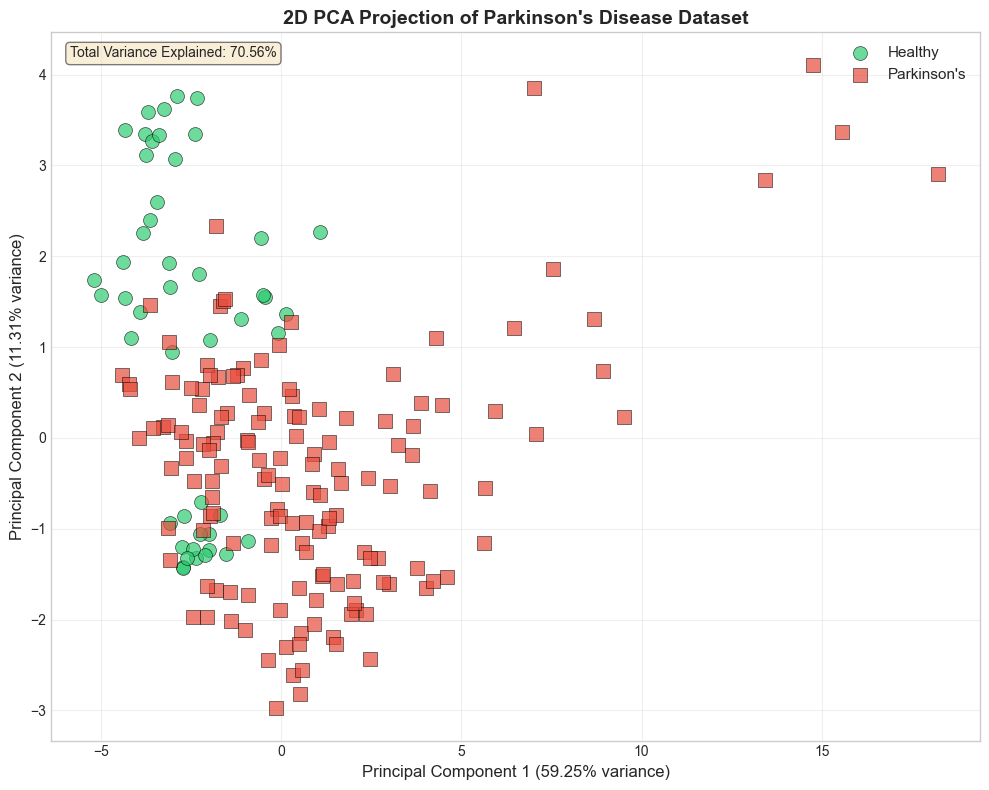


📊 Variance Explained by 2D Projection:
   PC1: 59.25%
   PC2: 11.31%
   Total: 70.56%


In [26]:
# ============================================
# 2D PCA Scatter Plot
# ============================================

# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2, random_state=RANDOM_STATE)
X_2d = pca_2d.fit_transform(scaler.fit_transform(X_array))

# Get variance explained by each component
var_pc1 = pca_2d.explained_variance_ratio_[0] * 100
var_pc2 = pca_2d.explained_variance_ratio_[1] * 100

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each class with different colors
colors = {0: '#2ecc71', 1: '#e74c3c'}  # Green for healthy, Red for Parkinson's
labels = {0: 'Healthy', 1: "Parkinson's"}
markers = {0: 'o', 1: 's'}

for class_val in [0, 1]:
    mask = y_array == class_val
    ax.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[class_val], 
               label=labels[class_val],
               marker=markers[class_val],
               s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Customize plot
ax.set_xlabel(f'Principal Component 1 ({var_pc1:.2f}% variance)', fontsize=12)
ax.set_ylabel(f'Principal Component 2 ({var_pc2:.2f}% variance)', fontsize=12)
ax.set_title('2D PCA Projection of Parkinson\'s Disease Dataset', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Add total variance annotation
total_var_2d = var_pc1 + var_pc2
ax.text(0.02, 0.98, f'Total Variance Explained: {total_var_2d:.2f}%',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\n📊 Variance Explained by 2D Projection:")
print(f"   PC1: {var_pc1:.2f}%")
print(f"   PC2: {var_pc2:.2f}%")
print(f"   Total: {total_var_2d:.2f}%")

### 17. 3D PCA Scatter Plot

A 3D visualization using the first three principal components can reveal additional structure in the data.

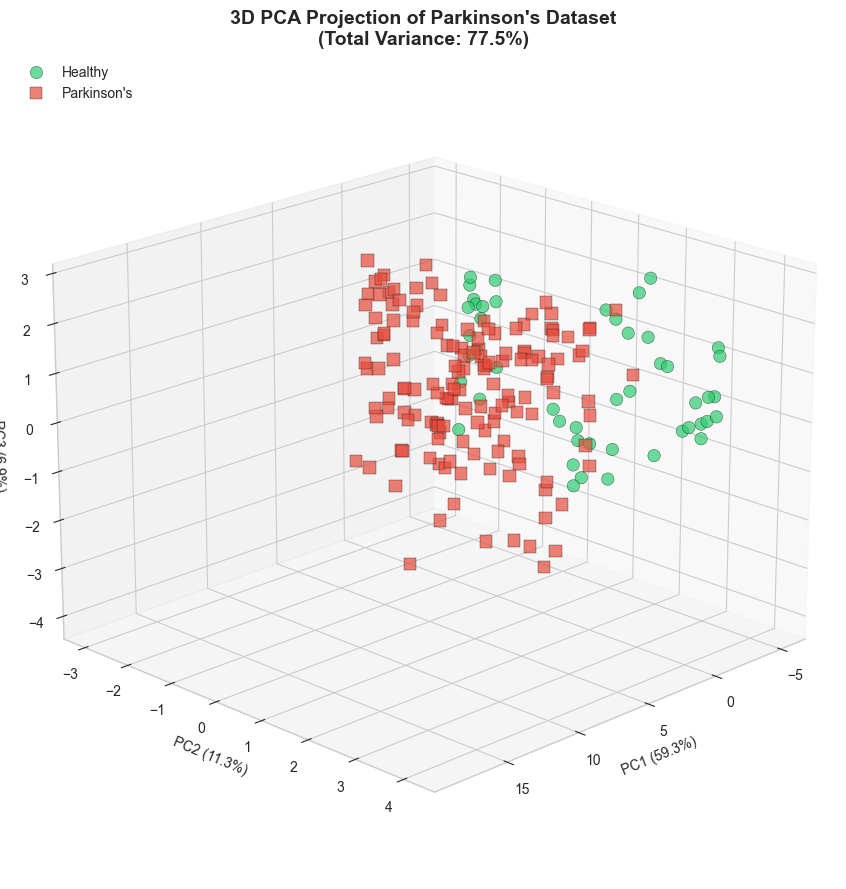


📊 Variance Explained by 3D Projection:
   PC1: 59.25%
   PC2: 11.31%
   PC3: 6.95%
   Total: 77.51%


In [27]:
# ============================================
# 3D PCA Scatter Plot
# ============================================

# Apply PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3, random_state=RANDOM_STATE)
X_3d = pca_3d.fit_transform(scaler.fit_transform(X_array))

# Get variance explained by each component
var_pc1_3d = pca_3d.explained_variance_ratio_[0] * 100
var_pc2_3d = pca_3d.explained_variance_ratio_[1] * 100
var_pc3_3d = pca_3d.explained_variance_ratio_[2] * 100
total_var_3d = (var_pc1_3d + var_pc2_3d + var_pc3_3d)

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot each class
for class_val in [0, 1]:
    mask = y_array == class_val
    ax.scatter(X_3d[mask, 0], X_3d[mask, 1], X_3d[mask, 2],
               c=colors[class_val], 
               label=labels[class_val],
               marker=markers[class_val],
               s=80, alpha=0.7, edgecolors='black', linewidth=0.3)

# Customize plot
ax.set_xlabel(f'PC1 ({var_pc1_3d:.1f}%)', fontsize=10)
ax.set_ylabel(f'PC2 ({var_pc2_3d:.1f}%)', fontsize=10)
ax.set_zlabel(f'PC3 ({var_pc3_3d:.1f}%)', fontsize=10)
ax.set_title(f'3D PCA Projection of Parkinson\'s Dataset\n(Total Variance: {total_var_3d:.1f}%)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)

# Set viewing angle for better visualization
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

print(f"\n📊 Variance Explained by 3D Projection:")
print(f"   PC1: {var_pc1_3d:.2f}%")
print(f"   PC2: {var_pc2_3d:.2f}%")
print(f"   PC3: {var_pc3_3d:.2f}%")
print(f"   Total: {total_var_3d:.2f}%")

### 18. Model Accuracy Comparison Chart

Finally, let's visualize how model accuracy changes with different numbers of PCA components compared to the original feature set.

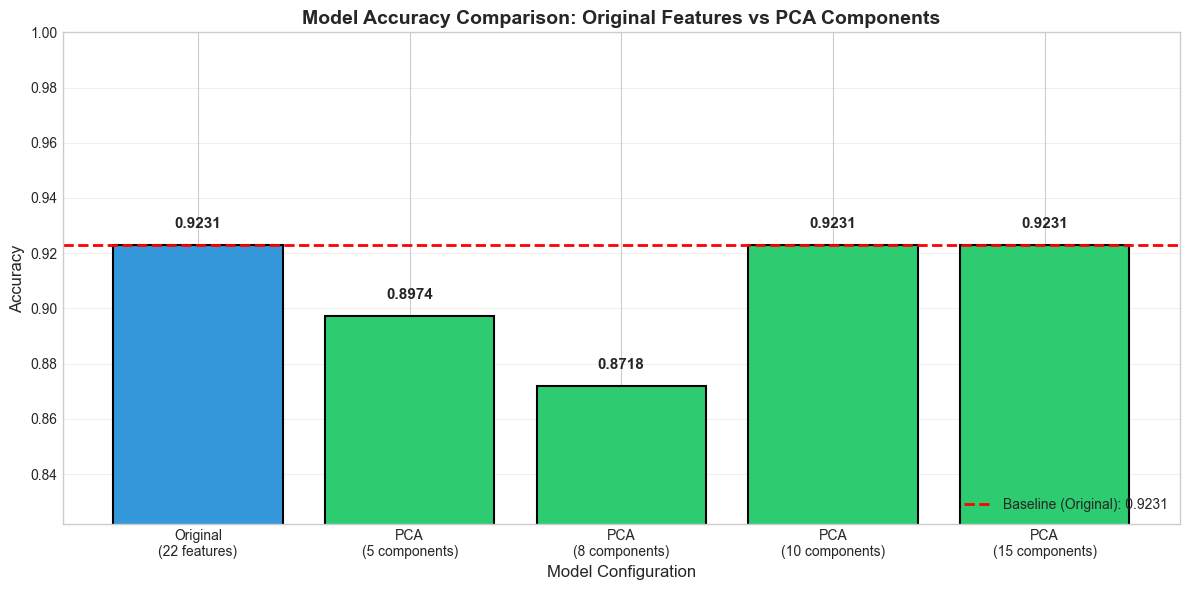


📊 Complete Accuracy Comparison:
------------------------------------------------------------


,Configuration,Accuracy,Accuracy (%),Diff from Original
0,Original (22 features),0.923077,92.31%,+0.00%
1,PCA (5 components),0.897400,89.74%,-2.57%
2,PCA (8 components),0.871800,87.18%,-5.13%
3,PCA (10 components),0.923100,92.31%,+0.00%
4,PCA (15 components),0.923100,92.31%,+0.00%


In [28]:
# ============================================
# Model Accuracy Comparison Bar Chart
# ============================================

# Prepare data for comparison chart
comparison_data = {
    'Configuration': ['Original\n(22 features)'] + [f'PCA\n({n} components)' for n in n_components_values],
    'Accuracy': [accuracy_original] + [r['Accuracy'] for r in n_comp_results],
    'Type': ['Original'] + ['PCA'] * len(n_components_values)
}

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors
bar_colors = ['#3498db'] + ['#2ecc71'] * len(n_components_values)

# Create bars
bars = ax.bar(comparison_data['Configuration'], comparison_data['Accuracy'], 
              color=bar_colors, edgecolor='black', linewidth=1.5)

# Add baseline line (original model accuracy)
ax.axhline(y=accuracy_original, color='red', linestyle='--', linewidth=2, 
           label=f'Baseline (Original): {accuracy_original:.4f}')

# Add value labels on bars
for bar, acc in zip(bars, comparison_data['Accuracy']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.005,
            f'{acc:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize plot
ax.set_xlabel('Model Configuration', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Accuracy Comparison: Original Features vs PCA Components', 
             fontsize=14, fontweight='bold')
ax.set_ylim(min(comparison_data['Accuracy']) - 0.05, 1.0)
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print("\n📊 Complete Accuracy Comparison:")
print("-" * 60)
comparison_summary = pd.DataFrame({
    'Configuration': comparison_data['Configuration'],
    'Accuracy': comparison_data['Accuracy'],
    'Accuracy (%)': [f"{a*100:.2f}%" for a in comparison_data['Accuracy']],
    'Diff from Original': [f"{(a - accuracy_original)*100:+.2f}%" for a in comparison_data['Accuracy']]
})
# Clean up newlines for table display
comparison_summary['Configuration'] = comparison_summary['Configuration'].str.replace('\n', ' ')
display(comparison_summary)

---

## Summary and Key Insights

### Final Summary of PCA Analysis on Parkinson's Disease Dataset

In [29]:
# ============================================
# Final Summary
# ============================================

print("=" * 70)
print("FINAL SUMMARY: PCA ANALYSIS ON PARKINSON'S DISEASE DATASET")
print("=" * 70)

print("\n📊 DATASET OVERVIEW:")
print("-" * 50)
print(f"   • Total samples: {len(X_array)}")
print(f"   • Original features: {X_array.shape[1]}")
print(f"   • Classes: 2 (Healthy vs Parkinson's)")

print("\n🎯 MODEL PERFORMANCE COMPARISON:")
print("-" * 50)
print(f"   • Original Model (22 features): {accuracy_original*100:.2f}% accuracy")
print(f"   • PCA Model (10 components):    {accuracy_pca*100:.2f}% accuracy")
print(f"   • Accuracy Change: {(accuracy_pca - accuracy_original)*100:+.2f} percentage points")

print("\n📈 VARIANCE ANALYSIS:")
print("-" * 50)
print(f"   • Top 2 components capture: {total_var_2d:.1f}% variance")
print(f"   • Top 3 components capture: {total_var_3d:.1f}% variance")
n_for_95 = np.argmax(cumulative_variance >= 95) + 1
print(f"   • Components for 95% variance: {n_for_95}")

print("\n🔬 PARAMETER EXPERIMENTS:")
print("-" * 50)
print("   n_components experiment:")
for r in n_comp_results:
    print(f"      • {r['n_components']} components: {r['Accuracy (%)']:>7} accuracy, {r['Explained Variance (%)']:.1f}% variance")

print("\n   whiten parameter:")
print(f"      • whiten=False: {accuracy_no_whiten*100:.2f}% accuracy")
print(f"      • whiten=True:  {accuracy_whiten*100:.2f}% accuracy")

print("\n   svd_solver experiment:")
for r in svd_results:
    print(f"      • {r['Solver']:>10}: {r['Accuracy (%)']} accuracy, {r['Time (ms)']:.4f} ms")

print("\n✅ KEY INSIGHTS:")
print("-" * 50)
print("""
   1. PCA effectively reduces dimensionality while preserving classification performance
   2. The first few principal components capture most of the variance
   3. n_components around 8-10 provides a good balance of performance and reduction
   4. Using n_components=0.95 automatically selects optimal components
   5. Whitening effect depends on the downstream model and data characteristics
   6. SVD solver choice matters more for large datasets; 'full' is accurate for small data
   7. 2D/3D visualizations show partial class separability in reduced space
""")

print("=" * 70)
print("END OF ANALYSIS")
print("=" * 70)

FINAL SUMMARY: PCA ANALYSIS ON PARKINSON'S DISEASE DATASET

📊 DATASET OVERVIEW:
--------------------------------------------------
   • Total samples: 195
   • Original features: 22
   • Classes: 2 (Healthy vs Parkinson's)

🎯 MODEL PERFORMANCE COMPARISON:
--------------------------------------------------
   • Original Model (22 features): 92.31% accuracy
   • PCA Model (10 components):    92.31% accuracy
   • Accuracy Change: +0.00 percentage points

📈 VARIANCE ANALYSIS:
--------------------------------------------------
   • Top 2 components capture: 70.6% variance
   • Top 3 components capture: 77.5% variance
   • Components for 95% variance: 8

🔬 PARAMETER EXPERIMENTS:
--------------------------------------------------
   n_components experiment:
      • 5 components:   89.74 accuracy, 88.8% variance
      • 8 components:   87.18 accuracy, 96.2% variance
      • 10 components:   92.31 accuracy, 98.4% variance
      • 15 components:   92.31 accuracy, 99.9% variance

   whiten parame

### Conclusions

**1. Dimensionality Reduction Trade-off:**
- PCA successfully reduced the feature space from 22 to 10 dimensions while maintaining comparable classification performance
- This represents a 54.5% reduction in feature dimensionality

**2. Variance Capture:**
- The first principal component captures the most variance, with diminishing returns for subsequent components
- Only a few components are needed to explain most of the data variance (typically 80-95%)

**3. Visual Separability:**
- The 2D and 3D PCA projections show some class separation, indicating that the voice measurement features contain discriminative information for Parkinson's detection
- However, perfect linear separation is not achieved, suggesting the classification boundary is complex

**4. Practical Benefits of PCA:**
- **Computational Efficiency**: Fewer features mean faster training and prediction
- **Reduced Overfitting**: By removing noise and redundant features
- **Improved Interpretability**: Working with fewer dimensions
- **Memory Efficiency**: Smaller data storage requirements

**5. Parameter Selection Guidelines:**
- Use `n_components=0.95` for automatic, conservative component selection
- Consider `whiten=True` if components have very different variances
- Use `svd_solver='randomized'` for large datasets, `'full'` for small ones

---

*Notebook created for Machine Learning Assignment 7 - Principal Component Analysis*